## 2. Thực hành

In [3]:
#Bài tham khảo: https://towardsdatascience.com/bitcoin-price-prediction-using-lstm-9eb0938c22bd
#Bài tham khảo 2:https://livecodestream.dev/post/predicting-the-price-of-bitcoin-intro-to-lstm/

### 2.1 Chuẩn bị thư viện và dữ liệu

In [8]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


#### Ghi chú
- Dense ( ): Layer này cũng như một layer neural network bình thường, với các tham số sau:
    - units : số chiều output, như số class sau khi train ( chó , mèo, lợn, gà).
    - activation : chọn activation đơn giản với sigmoid thì output có 1 class.
    - use_bias : có sử dụng bias hay không (True or False)

- Sequential là thư viện dùng để khởi tạo một mạng Neural Network

**Import dữ liệu và loại bỏ những trường không cần thiết**

In [9]:
df = pd.read_csv('BTC_CSV5.csv')
df.pop('Currency')
df.pop('24h Open (USD)')
df.pop('24h High (USD)')
df.pop('24h Low (USD)')
df.pop('Closing Price (USD)')
df

,Date,Closing_Price
0,2020-05-21,0.954089
1,2020-05-22,0.914115
2,2020-05-23,0.919285
3,2020-05-24,0.922008
4,2020-05-25,0.904872
...,...,...
362,2021-05-18,4.314447
363,2021-05-19,4.319605
364,2021-05-20,3.943924
365,2021-05-21,3.975609


!['Neural Network Form'](https://miro.medium.com/max/2625/1*cuTSPlTq0a_327iTPJyD-Q.png)

### Vẽ đồ thị minh họa

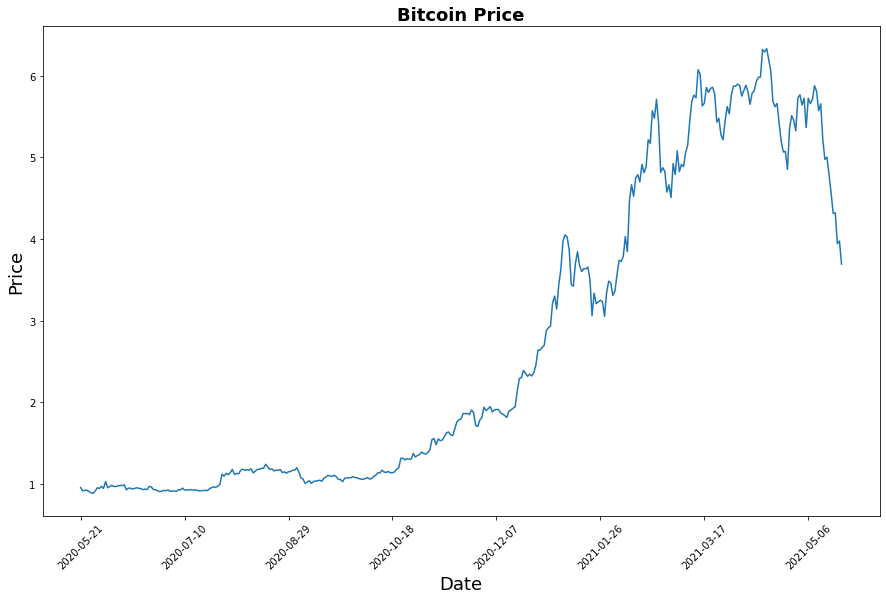

In [10]:
price = df[['Closing_Price']]

plt.figure(figsize = (15,9))
plt.plot(price)
plt.xticks(range(0, df.shape[0],50), df['Date'].loc[::50],rotation=45)
plt.title("Bitcoin Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

### 2.2 Chia dữ liệu train/set

- Vấn đề chia dữ liệu train/set
    - Train data: Dùng để học thuật toán máy học
    - Test data: Dùng để kiểm chứng kết quả của mô hình dự báo

 - Viết hàm univariate_data

In [14]:
price = np.array(price)
price

array([[0.95408866],
       [0.91411506],
       [0.91928451],
       [0.92200759],
       [0.90487151],
       [0.89057816],
       [0.88357272],
       [0.91129792],
       [0.95075247],
       [0.94252819],
       [0.96883244],
       [0.94276701],
       [1.0268582 ],
       [0.95161354],
       [0.96670608],
       [0.98113671],
       [0.96596613],
       [0.9677051 ],
       [0.97374586],
       [0.97919279],
       [0.9786142 ],
       [0.9874967 ],
       [0.92608326],
       [0.94642281],
       [0.94586598],
       [0.93519537],
       [0.9441769 ],
       [0.95106606],
       [0.94576271],
       [0.93986421],
       [0.92797608],
       [0.93530782],
       [0.92891045],
       [0.96809471],
       [0.96096803],
       [0.93111363],
       [0.92526334],
       [0.91717321],
       [0.90221538],
       [0.91018501],
       [0.91880614],
       [0.91484449],
       [0.92363168],
       [0.90977974],
       [0.90943246],
       [0.91246535],
       [0.90554645],
       [0.927

In [16]:
norm_data = min_max_scaler.fit_transform(price)

In [17]:
train_size = int(len(df) * 0.80)
test_size = len(df) - train_size

In [18]:
train, test = price[0:train_size,:], price[train_size:len(norm_data),:]
print(len(train), len(test))

293 74


In [19]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [20]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(289, 3)
(289,)
(70, 3)
(70,)


In [21]:
print(trainX)

[[0.95408866 0.91411506 0.91928451]
 [0.91411506 0.91928451 0.92200759]
 [0.91928451 0.92200759 0.90487151]
 [0.92200759 0.90487151 0.89057816]
 [0.90487151 0.89057816 0.88357272]
 [0.89057816 0.88357272 0.91129792]
 [0.88357272 0.91129792 0.95075247]
 [0.91129792 0.95075247 0.94252819]
 [0.95075247 0.94252819 0.96883244]
 [0.94252819 0.96883244 0.94276701]
 [0.96883244 0.94276701 1.0268582 ]
 [0.94276701 1.0268582  0.95161354]
 [1.0268582  0.95161354 0.96670608]
 [0.95161354 0.96670608 0.98113671]
 [0.96670608 0.98113671 0.96596613]
 [0.98113671 0.96596613 0.9677051 ]
 [0.96596613 0.9677051  0.97374586]
 [0.9677051  0.97374586 0.97919279]
 [0.97374586 0.97919279 0.9786142 ]
 [0.97919279 0.9786142  0.9874967 ]
 [0.9786142  0.9874967  0.92608326]
 [0.9874967  0.92608326 0.94642281]
 [0.92608326 0.94642281 0.94586598]
 [0.94642281 0.94586598 0.93519537]
 [0.94586598 0.93519537 0.9441769 ]
 [0.93519537 0.9441769  0.95106606]
 [0.9441769  0.95106606 0.94576271]
 [0.95106606 0.94576271 0.93

In [22]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], n_features))
trainX.shape
testX = testX.reshape((testX.shape[0], testX.shape[1], n_features))
testX.shape

(70, 3, 1)

### 2.4 Building Model

In [23]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(look_back, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(trainX, trainY, epochs=300, verbose=1)

Epoch 1/300
10/10 [==============================] - 7s 5ms/step - loss: 4.8943
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 5.0744
Epoch 3/300
10/10 [==============================] - 0s 3ms/step - loss: 3.6121
Epoch 4/300
10/10 [==============================] - 0s 9ms/step - loss: 1.8372
Epoch 5/300
10/10 [==============================] - 0s 12ms/step - loss: 0.4760
Epoch 6/300
10/10 [==============================] - 0s 10ms/step - loss: 0.3070
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 0.2737
Epoch 8/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1974
Epoch 9/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1672
Epoch 10/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1246
Epoch 11/300
10/10 [==============================] - 0s 5ms/step - loss: 0.1087
Epoch 12/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0883
Epoch 13/300
10/10 [===============

10/10 [==============================] - 0s 4ms/step - loss: 0.0222
Epoch 201/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0223
Epoch 202/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0215
Epoch 203/300
10/10 [==============================] - 0s 6ms/step - loss: 0.0663
Epoch 204/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0372
Epoch 205/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0431
Epoch 206/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 207/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 208/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0260
Epoch 209/300
10/10 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 210/300
10/10 [==============================] - 0s 4ms/step - loss: 0.0184
Epoch 211/300
10/10 [==============================] - 0s 5ms/step - loss: 0.0175
Epoch 212/300
10/10 [=========

In [25]:
y_pred= model.predict(testX)


In [26]:
y_pred.reshape(-1,1)

array([[5.752584 ],
       [5.8300996],
       [5.948043 ],
       [5.997924 ],
       [5.9600205],
       [5.8710885],
       [5.82838  ],
       [5.863984 ],
       [5.919223 ],
       [5.917747 ],
       [5.9094677],
       [5.789222 ],
       [5.7015343],
       [5.548781 ],
       [5.4946823],
       [5.4893594],
       [5.582123 ],
       [5.6667957],
       [5.7674646],
       [5.8286066],
       [5.9181185],
       [5.956443 ],
       [5.9568744],
       [5.9205675],
       [5.907526 ],
       [5.90631  ],
       [5.9148464],
       [5.868601 ],
       [5.8539104],
       [5.850611 ],
       [5.9301505],
       [5.9790277],
       [6.021966 ],
       [6.1390204],
       [6.200512 ],
       [6.293089 ],
       [6.2522297],
       [6.1934714],
       [6.0167117],
       [5.88088  ],
       [5.7745275],
       [5.689459 ],
       [5.575154 ],
       [5.407594 ],
       [5.3084927],
       [5.2003474],
       [5.3003445],
       [5.409475 ],
       [5.589377 ],
       [5.5822577],


In [27]:
y_pred

array([[5.752584 ],
       [5.8300996],
       [5.948043 ],
       [5.997924 ],
       [5.9600205],
       [5.8710885],
       [5.82838  ],
       [5.863984 ],
       [5.919223 ],
       [5.917747 ],
       [5.9094677],
       [5.789222 ],
       [5.7015343],
       [5.548781 ],
       [5.4946823],
       [5.4893594],
       [5.582123 ],
       [5.6667957],
       [5.7674646],
       [5.8286066],
       [5.9181185],
       [5.956443 ],
       [5.9568744],
       [5.9205675],
       [5.907526 ],
       [5.90631  ],
       [5.9148464],
       [5.868601 ],
       [5.8539104],
       [5.850611 ],
       [5.9301505],
       [5.9790277],
       [6.021966 ],
       [6.1390204],
       [6.200512 ],
       [6.293089 ],
       [6.2522297],
       [6.1934714],
       [6.0167117],
       [5.88088  ],
       [5.7745275],
       [5.689459 ],
       [5.575154 ],
       [5.407594 ],
       [5.3084927],
       [5.2003474],
       [5.3003445],
       [5.409475 ],
       [5.589377 ],
       [5.5822577],


In [28]:
testY = testY.reshape(-1,1)
testY.shape

(70, 1)

In [29]:
date = pd.to_datetime(df.Date).astype(np.int64)

In [30]:
date = date[(len(date)-70):]
date

297    1615680000000000000
298    1615766400000000000
299    1615852800000000000
300    1615939200000000000
301    1616025600000000000
              ...         
362    1621296000000000000
363    1621382400000000000
364    1621468800000000000
365    1621555200000000000
366    1621641600000000000
Name: Date, Length: 70, dtype: int64

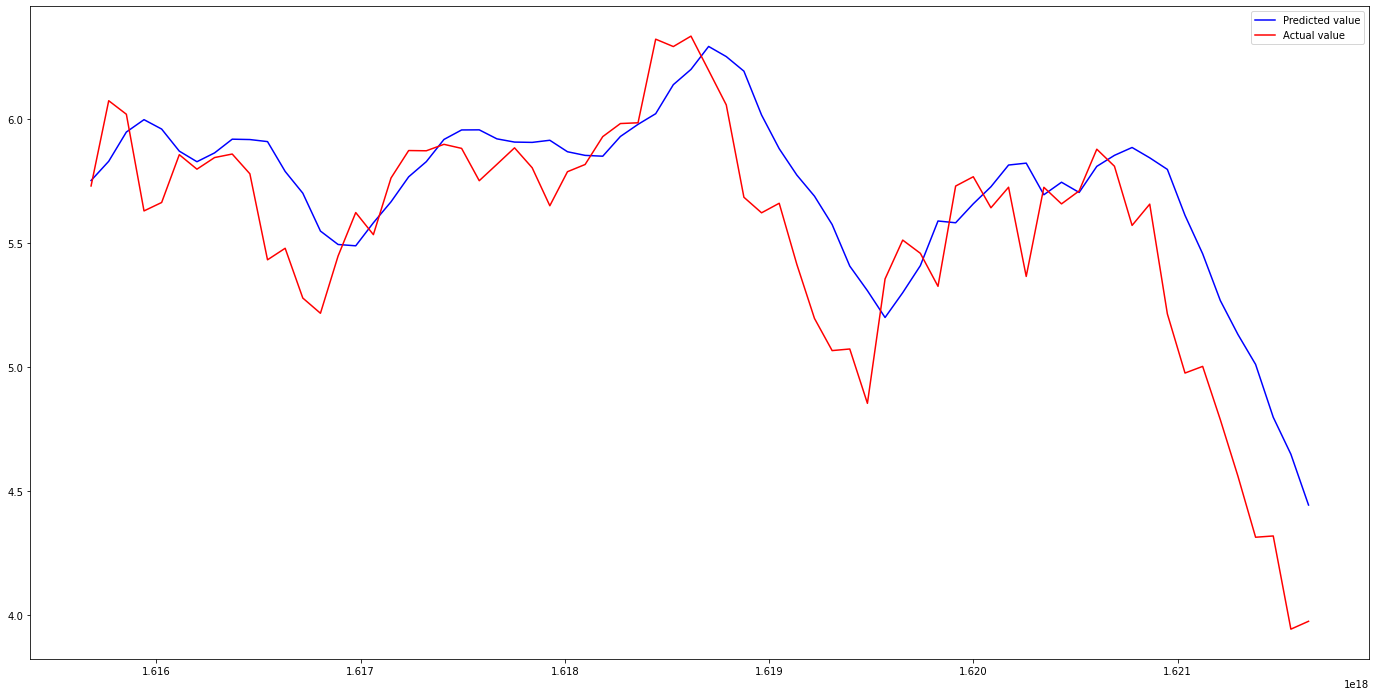

In [31]:
fig= plt.figure(figsize=(24,12))
plt.plot(date,y_pred,color='blue', label='Predicted value')
plt.plot(date,testY,color='red', label='Actual value')
plt.legend()
plt.show()

### 2.5 Đánh Giá

In [198]:
from sklearn.metrics import mean_squared_error

In [199]:
print(mean_squared_error(testY, y_pred))

0.06467082401939195
